In [1]:
from __future__ import print_function
from keras import backend as K
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, BatchNormalization, Input, Dropout, concatenate

from tensorflow.keras.preprocessing.image import *

epochs = 15
batch_size = 64

x_train = np.load("here/train.npy")
y_train = np.load("here/Y_train.npy")
x_test = np.load("here/test.npy")
y_test = np.load("here/Y_test.npy")

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.


(33600, 28, 28, 3)
(33600, 96)
(14400, 28, 28, 3)
(14400, 96)


In [2]:
def inception_block(x, filters):
#     last = x

    net1 = Conv2D(filters = filters, kernel_size=(1,1), padding='Same', activation = 'relu')(x)

    net2 = Conv2D(filters = filters, kernel_size=(1,1), padding='Same', activation = 'relu')(x)
    net2 = Conv2D(filters = filters, kernel_size=(3,3), padding='Same', activation = 'relu')(net2)

    net3 = Conv2D(filters = filters, kernel_size=(1,1), padding='Same', activation = 'relu')(x)
    net3 = Conv2D(filters = filters, kernel_size=(3,3), padding='Same', activation = 'relu')(net3)
    net3 = Conv2D(filters = filters, kernel_size=(3,3), padding='Same', activation = 'relu')(net3)

    output = concatenate([net1, net2, net3], axis=3)
    return output

In [11]:
input_shape = (28,28,3)

input_layer = Input(shape=input_shape)
x = Conv2D(filters = 32, kernel_size=(5,5), padding='Same', activation = 'relu')(input_layer)
x = Conv2D(filters = 32, kernel_size=(5,5), padding='Same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(5, 5), strides=(2,2))(x)

# last = x

x = inception_block(x,32)
x = MaxPool2D(pool_size=(5, 5), strides=(2,2),padding='Same')(x)

# x = MaxPool2D(pool_size=(3, 3), strides=(2,2))(x)
# x = inception_block(x,64)
# x = MaxPool2D(pool_size=(3, 3), strides=(1,1),padding='Same')(x)

x = inception_block(x,64)
x = MaxPool2D(pool_size=(3, 3), strides=(1,1),padding='Same')(x)

# x = concatenate([x, last], axis=3)
# x = Conv2D(filters = 128, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = Conv2D(filters = 128, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = MaxPool2D(pool_size=(3, 3), strides=(1,1))(x)

# x = Conv2D(filters = 128, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = Conv2D(filters = 128, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = MaxPool2D(pool_size=(3, 3), strides=(2,2),padding='Same')(x)

# x = Conv2D(filters = 256, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = Conv2D(filters = 256, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = MaxPool2D(pool_size=(3, 3), strides=(1,1),padding='Same')(x)

x = Flatten()(x)

# x = Dense(2048, activation=tf.nn.relu)(x)
# x = Dropout(0.5)(x)

x = Dense(1024, activation=tf.nn.relu)(x)
x = Dropout(0.5)(x)

# x = Dense(128, activation=tf.nn.relu)(x)
# x = Dropout(0.5)(x)

x = Dense(96, activation=tf.nn.softmax)(x)

from tensorflow.keras.models import Model


model = Model(input_layer, x)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 28, 28, 32)   2432        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 28, 28, 32)   25632       conv2d_42[0][0]                  
__________________________________________________________________________________________________
batch_normalization_v1_3 (Batch (None, 28, 28, 32)   128         conv2d_43[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [13]:
datagen = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    height_shift_range=0.1)


datagen.fit(x_train)
epochs = 15
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=len(x_train)/batch_size, epochs=epochs, validation_data=(x_test,y_test))
model.save_weights("line_2.h5")

# print(history.history.keys())

Epoch 1/15
525/525 [==============================] - 17s 32ms/step - loss: 0.0800 - acc: 0.9787 - val_loss: 0.0019 - val_acc: 0.9994
Epoch 2/15
525/525 [==============================] - 17s 32ms/step - loss: 0.0963 - acc: 0.9743 - val_loss: 0.0210 - val_acc: 0.9937
Epoch 3/15
525/525 [==============================] - 17s 33ms/step - loss: 0.0656 - acc: 0.9802 - val_loss: 0.0036 - val_acc: 0.9986
Epoch 4/15
525/525 [==============================] - 17s 33ms/step - loss: 0.0942 - acc: 0.9752 - val_loss: 0.0068 - val_acc: 0.9977
Epoch 5/15
525/525 [==============================] - 17s 33ms/step - loss: 0.0510 - acc: 0.9854 - val_loss: 0.0233 - val_acc: 0.9920
Epoch 6/15
525/525 [==============================] - 17s 33ms/step - loss: 0.0877 - acc: 0.9772 - val_loss: 0.0173 - val_acc: 0.9958
Epoch 7/15
525/525 [==============================] - 17s 33ms/step - loss: 0.0888 - acc: 0.9778 - val_loss: 0.0202 - val_acc: 0.9962
Epoch 8/15
525/525 [==============================] - 17s 33ms

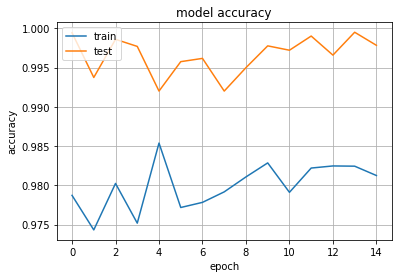

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("accuracy.jpg")

plt.show()

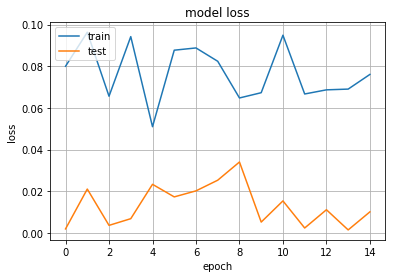

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("loss.jpg")
plt.show()

In [16]:
pr =model.predict(x_test)
model.evaluate(x_test, y_test)

14400/14400 [==============================] - 2s 125us/sample - loss: 0.0101 - acc: 0.9978


[0.010081323641313481, 0.9978472]

In [17]:
pred = []
for i in pr:
    x=np.argmax(i)
    pred.append(x)
pred = np.array(pred)

truth = []
for i in y_test:
    x=np.argmax(i)
    truth.append(x)
truth = np.array(truth)

In [18]:
f1 = f1_score(truth, pred, average="macro")
f1

0.9978473903136251

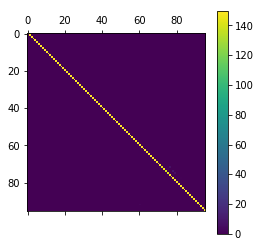

In [19]:
cm = np.array(confusion_matrix(truth,pred),dtype = np.float32)

np.save("confusion_matrix.npy",cm)
plt.matshow(cm)
plt.colorbar()
plt.savefig("confusion.jpg")